In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import math

In [2]:
# define a string of the CFTR primary sequence
CFTR_seq = 'MQRSPLEKASVVSKLFFSWTRPILRKGYRQRLELSDIYQIPSVDSADNLSEKLEREWDRELASKKNPKLINALRRCFFWRFMFYGIFLYLGEVTKAVQPLLLGRIIASYDPDNKEERSIAIYLGIGLCLLFIVRTLLLHPAIFGLHHIGMQMRIAMFSLIYKKTLKLSSRVLDKISIGQLVSLLSNNLNKFDEGLALAHFVWIAPLQVALLMGLIWELLQASAFCGLGFLIVLALFQAGLGRMMMKYRDQRAGKISERLVITSEMIENIQSVKAYCWEEAMEKMIENLRQTELKLTRKAAYVRYFNSSAFFFSGFFVVFLSVLPYALIKGIILRKIFTTISFCIVLRMAVTRQFPWAVQTWYDSLGAINKIQDFLQKQEYKTLEYNLTTTEVVMENVTAFWEEGFGELFEKAKQNNNNRKTSNGDDSLFFSNFSLLGTPVLKDINFKIERGQLLAVAGSTGAGKTSLLMVIMGELEPSEGKIKHSGRISFCSQFSWIMPGTIKENIIFGVSYDEYRYRSVIKACQLEEDISKFAEKDNIVLGEGGITLSGGQRARISLARAVYKDADLYLLDSPFGYLDVLTEKEIFESCVCKLMANKTRILVTSKMEHLKKADKILILHEGSSYFYGTFSELQNLQPDFSSKLMGCDSFDQFSAERRNSILTETLHRFSLEGDAPVSWTETKKQSFKQTGEFGEKRKNSILNPINSIRKFSIVQKTPLQMNGIEEDSDEPLERRLSLVPDSEQGEAILPRISVISTGPTLQARRRQSVLNLMTHSVNQGQNIHRKTTASTRKVSLAPQANLTELDIYSRRLSQETGLEISEEINEEDLKECFFDDMESIPAVTTWNTYLRYITVHKSLIFVLIWCLVIFLAEVAASLVVLWLLGNTPLQDKGNSTHSRNNSYAVIITSTSSYYVFYIYVGVADTLLAMGFFRGLPLVHTLITVSKILHHKMLHSVLQAPMSTLNTLKAGGILNRFSKDIAILDDLLPLTIFDFIQLLLIVIGAIAVVAVLQPYIFVATVPVIVAFIMLRAYFLQTSQQLKQLESEGRSPIFTHLVTSLKGLWTLRAFGRQPYFETLFHKALNLHTANWFLYLSTLRWFQMRIEMIFVIFFIAVTFISILTTGEGEGRVGIILTLAMNIMSTLQWAVNSSIDVDSLMRSVSRVFKFIDMPTEGKPTKSTKPYKNGQLSKVMIIENSHVKKDDIWPSGGQMTVKDLTAKYTEGGNAILENISFSISPGQRVGLLGRTGSGKSTLLSAFLRLLNTEGEIQIDGVSWDSITLQQWRKAFGVIPQKVFIFSGTFRKNLDPYEQWSDQEIWKVADEVGLRSVIEQFPGKLDFVLVDGGCVLSHGHKQLMCLARSVLSKAKILLLDQPSAHLDPVTYQIIRRTLKQAFADCTVILCEHRIEAMLECQQFLVIEENKVRQYDSIQKLLNERSLFRQAISPSDRVKLFPHRNSSKCKSKPQIAALKEETEEEVQDTRLSNSLEVLFQ'

F508del_cl_seq = 'PLEKASVVSKLFFSWTRPILRKGYRQRLELSDIYQIPSVDSADNLSEKLEREWDRELASKKNPKLINALRRCFFWRFMFYGIFLYLGEVTKAVQPLLLGRIIASYDPDNKEERSIAIYLGIGLCLLFIVRTLLLHPAIFGLHHIGMQMRIAMFSLIYKKTLKLSSRVLDKISIGQLVSLLSNNLNKFDEGLALAHFVWIAPLQVALLMGLIWELLQASAFCGLGFLIVLALFQAGLGRMMMKYRDQRAGKISERLVITSEMIENIQSVKAYCWEEAMEKMIENLRQTELKLTRKAAYVRYFNSSAFFFSGFFVVFLSVLPYALIKGIILRKIFTTISFCIVLRMAVTRQFPWAVQTWYDSLGAINKIQDFLQKQEYKTLEYNLTTTEVVMENVTAFWEPVLKDINFKIERGQLLAVAGSTGAGKTSLLMVIMGELEPSEGKIKHSGRISFCSQFSWIMPGTIKENIIGVSYDEYRYRSVIKACQLEEDISKFAEKDNIVLGEGGITLSGGQRARISLARAVYKDADLYLLDSPFGYLDVLTEKEIFESCVCKLMANKTRILVTSKMEHLKKADKILILHEGSSYFYGTFSELQNLQPDFSSKLMTTWNTYLRYITVHKSLIFVLIWCLVIFLAEVAASLVVLWLSTSSYYVFYIYVGVADTLLAMGFFRGLPLVHTLITVSKILHHKMLHSVLQAPMSTLNTLKAGGILNRFSKDIAILDDLLPLTIFDFIQLLLIVIGAIAVVAVLQPYIFVATVPVIVAFIMLRAYFLQTSQQLKQLESEGRSPIFTHLVTSLKGLWTLRAFGRQPYFETLFHKALNLHTANWFLYLSTLRWFQMRIEMIFVIFFIAVTFISILTTGEGEGRVGIILTLAMNIMSTLQWAVNSSIDVDSLMRSVSRVFKFIDMPTEGGQMTVKDLTAKYTEGGNAILENISFSISPGQRVGLLGRTGSGKSTLLSAFLRLLNTEGEIQIDGVSWDSITLQQWRKAFGVIPQKVFIFSGTFRKNLDPYEQWSDQEIWKVADEVGLRSVIEQFPGKLDFVLVDGGCVLSHGHKQLMCLARSVLSKAKILLLDEPSAHLDPVTYQIIRRTLKQAFADCTVILCEHRIEAMLECQQFLVIEENKVRQYDSIQKLLNERSL'

F508del_op_seq = 'MQRSPLEKASVVSKLFFSWTRPILRKGYRQRLELSDIYQIPSVDSADNLSEKLEREWDRELASKKNPKLINALRRCFFWRFMFYGIFLYLGEVTKAVQPLLLGRIIASYDPDNKEERSIAIYLGIGLCLLFIVRTLLLHPAIFGLHHIGMQMRIAMFSLIYKKTLKLSSRVLDKISIGQLVSLLSNNLNKFDEGLALAHFVWIAPLQVALLMGLIWELLQASAFCGLGFLIVLALFQAGLGRMMMKYRDQRAGKISERLVITSEMIENIQSVKAYCWEEAMEKMIENLRQTELKLTRKAAYVRYFNSSAFFFSGFFVVFLSVLPYALIKGIILRKIFTTISFCIVLRMAVTRQFPWAVQTWYDSLGAINKIQDFLQKQEYKTLEYNLTTTEVVMENVTAFWEEGFGELFLLGTPVLKDINFKIERGQLLAVAGSTGAGKTSLLMVIMGELEPSEGKIKHSGRISFCSQFSWIMPGTIKENIIGVSYDEYRYRSVIKACQLEEDISKFAEKDNIVLGEGGITLSGGQRARISLARAVYKDADLYLLDSPFGYLDVLTEKEIFESCVCKLMANKTRILVTSKMEHLKKADKILILHEGSSYFYGTFSELQNLQTWNTYLRYITVHKSLIFVLIWCLVIFLAEVAASLVVLWLLGNTPLNNSYAVIITSTSSYYVFYIYVGVADTLLAMGFFRGLPLVHTLITVSKILHHKMLHSVLQAPMSTLNTLKAGGILNRFSKDIAILDDLLPLTIFDFIQLLLIVIGAIAVVAVLQPYIFVATVPVIVAFIMLRAYFLQTSQQLKQLESEGRSPIFTHLVTSLKGLWTLRAFGRQPYFETLFHKALNLHTANWFLYLSTLRWFQMRIEMIFVIFFIAVTFISILTTGEGEGRVGIILTLAMNIMSTLQWAVNSSIDVDSLMRSVSRVFKFIDMPTEGDIWPSGGQMTVKDLTAKYTEGGNAILENISFSISPGQRVGLLGRTGSGKSTLLSAFLRLLNTEGEIQIDGVSWDSITLQQWRKAFGVIPQKVFIFSGTFRKNLDPYEQWSDQEIWKVADEVGLRSVIEQFPGKLDFVLVDGGCVLSHGHKQLMCLARSVLSKAKILLLDQPSAHLDPVTYQIIRRTLKQAFADCTVILCEHRIEAMLECQQFLVIEENKVRQYDSIQKLLNERSLFRQAISPSDRVKLFP'

residues_WT_cl = np.arange(1,1437)
residues_WT_op = np.arange(1,1452)

residues_F508del_cl = np.arange(1,len(F508del_cl_seq)-1)
residues_F508del_op = np.arange(1,len(F508del_op_seq)-1)

# define a useful dictionary for converting amino acid one letter codes to three letter codes 
aa = {'A': "ALA", 'G': "GLY", 'D': 'ASP', 'R': "ARG", 'H': "HIS",
      'K': 'LYS', 'E': 'GLU', 'S': 'SER', 'T': 'THR', 'N': 'ASN', 
      'Q': 'GLN', 'C': 'CYS', 'P': 'PRO', 'V': "VAL", 'I': 'ILE',
      'L': "LUE", 'M': 'MET', 'F': 'PHE', 'Y': 'TYR', 'W': 'TRP'
     }

In [3]:
def pull_data(path, num_structs, file_name):
    empty_dict = {}
    for i in num_structs:
        fnm = path + 'res_RMSD/'+ file_name + '_{}.pdb'.format(i)
        x = np.genfromtxt(fnm, dtype = ['U15', 'float64'])
        empty_dict[str(i)] = x

    return empty_dict

In [4]:
def search_rmsd(rmsd, rmsd_data):
    # here we go 
    # begin by looping though the sasa dictionary of all the SASA data
    for key, value in rmsd.items():
        # turn the key into a number so you can index with it 
        k = int(key)
        # try to take the res out of the data - this will through an exception if not found
        for i in value:
            try:
                res = int(i[0].split('_')[2][:-1])
            except ValueError:
                continue 
                
            
            rmsd_data.loc[res,k] = i[1]

    return(rmsd_data)

In [5]:
def re_index(re_ind_df,ref_df,del_num):
    ind = []
    for i, val in enumerate(ref_df["1"]):
        if math.isnan(float(val)):
            continue
        if i == del_num:
            continue
        else: 
            ind.append(i)

    re_ind_df = pd.DataFrame.set_index(re_ind_df, np.array(ind))

    return re_ind_df

## Pull Data

In [6]:
# define the path to the files of interest
WT_path_cl = '../refine_WT/closed/'
WT_path_op = '../refine_WT/open/'

#F508_cl_path = '../CM_F508del/closed_NBD1_clusters/'
F508_cl_path = '../CM_F508del/closed_lowest_scoring_models/'
F508_op_path = '../refine_F508del_templates/open/'

#R1070W_cl_path = '../CM_R1070W_F508del/closed_NBD1_clusters/'
R1070W_cl_path = '../CM_R1070W_F508del/closed_lowest_scoring_models/'

In [7]:
WT_rmsd_cl = pull_data(WT_path_cl, range(2000), '5uak_WT_res_rmsd' )

In [8]:
WT_rmsd_op = pull_data(WT_path_op, range(2000), '6msm_WT_res_rmsd' )

In [7]:
F508del_lowest = [172,281,290,266,34,106,321,336,255,278,310,181,467,286,238,33,62,14,221,210,436,65,25,300,206,182,42,237,82,160,302,231,404,164,12,259,399,205,435,240,30,177,433,497,98,330,416,287,227,320,393,304,173,147,244,314,264,6,84,153,437,274,361,254,17,490,184,276,115,413,43,279,53,148,359,374,11,103,59,496,70,63,124,386,457,125,241,296,162,428,267,93,188,293,97,484,212,136,28]

In [8]:
F508del_rmsd_cl = pull_data(F508_cl_path, F508del_lowest, '5uak_F508del_res_rmsd')

In [13]:
F508del_rmsd_op = pull_data(F508_op_path, range(2000), '6msm_F508del_res_rmsd')

In [9]:
R1070W_lowest = [37,158,161,215,239,59,294,149,486,135,130,463,391,353,461,396,324,300,72,299,384,228,61,319,430,71,441,69,477,124,292,151,49,271,469,268,471,206,289,134,77,51,226,170,233,186,281,116,257,414,418,185,393,334,106,175,68,273,295,20,177,47,433,125,221,432,115,485,401,409,445,35,220,345,46,311,84,282,374,341,60,287,1,359,113,381,301,200,155,460,146,275,475,234,413,38,499,427,364]

In [10]:
R1070W_rmsd_cl = pull_data(R1070W_cl_path, R1070W_lowest, '5uak_R1070W_F508del_res_rmsd')

## Rangle the RMSD data into a dataframe

In [14]:
WT_rmsd_data_cl = pd.DataFrame(index = residues_WT_cl)
search_rmsd(WT_rmsd_cl, WT_rmsd_data_cl)
WT_rmsd_data_cl.to_csv('WT_rmsd_data_cl_refine_2000.csv', index = False)

In [15]:
WT_rmsd_data_op = pd.DataFrame(index = residues_WT_op)
search_rmsd(WT_rmsd_op, WT_rmsd_data_op)
WT_rmsd_data_op.to_csv('WT_rmsd_data_op_refine_2000.csv', index = False)

In [11]:
F508del_rmsd_data_cl = pd.DataFrame(index = residues_F508del_cl)
search_rmsd(F508del_rmsd_cl, F508del_rmsd_data_cl)
#F508del_rmsd_data_cl.to_csv('F508del_rmsd_data_cl_refine_2000.csv', index = False)
print('finished')

finished


In [17]:
F508del_rmsd_data_op = pd.DataFrame(index = residues_F508del_op)
search_rmsd(F508del_rmsd_op, F508del_rmsd_data_op)
F508del_rmsd_data_op.to_csv('F508del_rmsd_data_op_refine_2000.csv', index = False)

In [12]:
R1070W_rmsd_data_cl = pd.DataFrame(index = residues_F508del_cl)
search_rmsd(R1070W_rmsd_cl, R1070W_rmsd_data_cl)
print('finished')

finished


## Read in the rangled data

In [13]:
WT_rmsd_data_cl = pd.read_csv('../analysis/WT_rmsd_data_cl_refine_2000.csv')

In [22]:
WT_rmsd_data_op = pd.read_csv('../analysis/WT_rmsd_data_op_refine_2000.csv')

In [49]:
F508del_rmsd_data_cl = pd.read_csv('../analysis/F508del_rmsd_data_cl_refine_2000.csv')

In [25]:
F508del_rmsd_data_op = pd.read_csv('../analysis/F508del_rmsd_data_op_refine_2000.csv')

## Take the average

In [14]:
WT_rmsd_data_cl['avg'] = WT_rmsd_data_cl.mean(axis = 1)

In [31]:
WT_rmsd_data_op['avg'] = WT_rmsd_data_op.mean(axis = 1)

In [15]:
F508del_rmsd_data_cl['avg'] = F508del_rmsd_data_cl.mean(axis = 1)

In [30]:
F508del_rmsd_data_op['avg'] = F508del_rmsd_data_op.mean(axis = 1)

In [16]:
R1070W_rmsd_data_cl['avg'] = R1070W_rmsd_data_cl.mean(axis = 1)

## Re-index the F508del data

In [17]:
F508del_rmsd_data_cl = re_index(F508del_rmsd_data_cl, WT_rmsd_data_cl,508)

In [55]:
F508del_rmsd_data_op = re_index(F508del_rmsd_data_op, WT_rmsd_data_op,508)

In [18]:
R1070W_rmsd_data_cl = re_index(R1070W_rmsd_data_cl, WT_rmsd_data_cl, 508)

## Plot the data

/home/mcdonaef/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:841: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


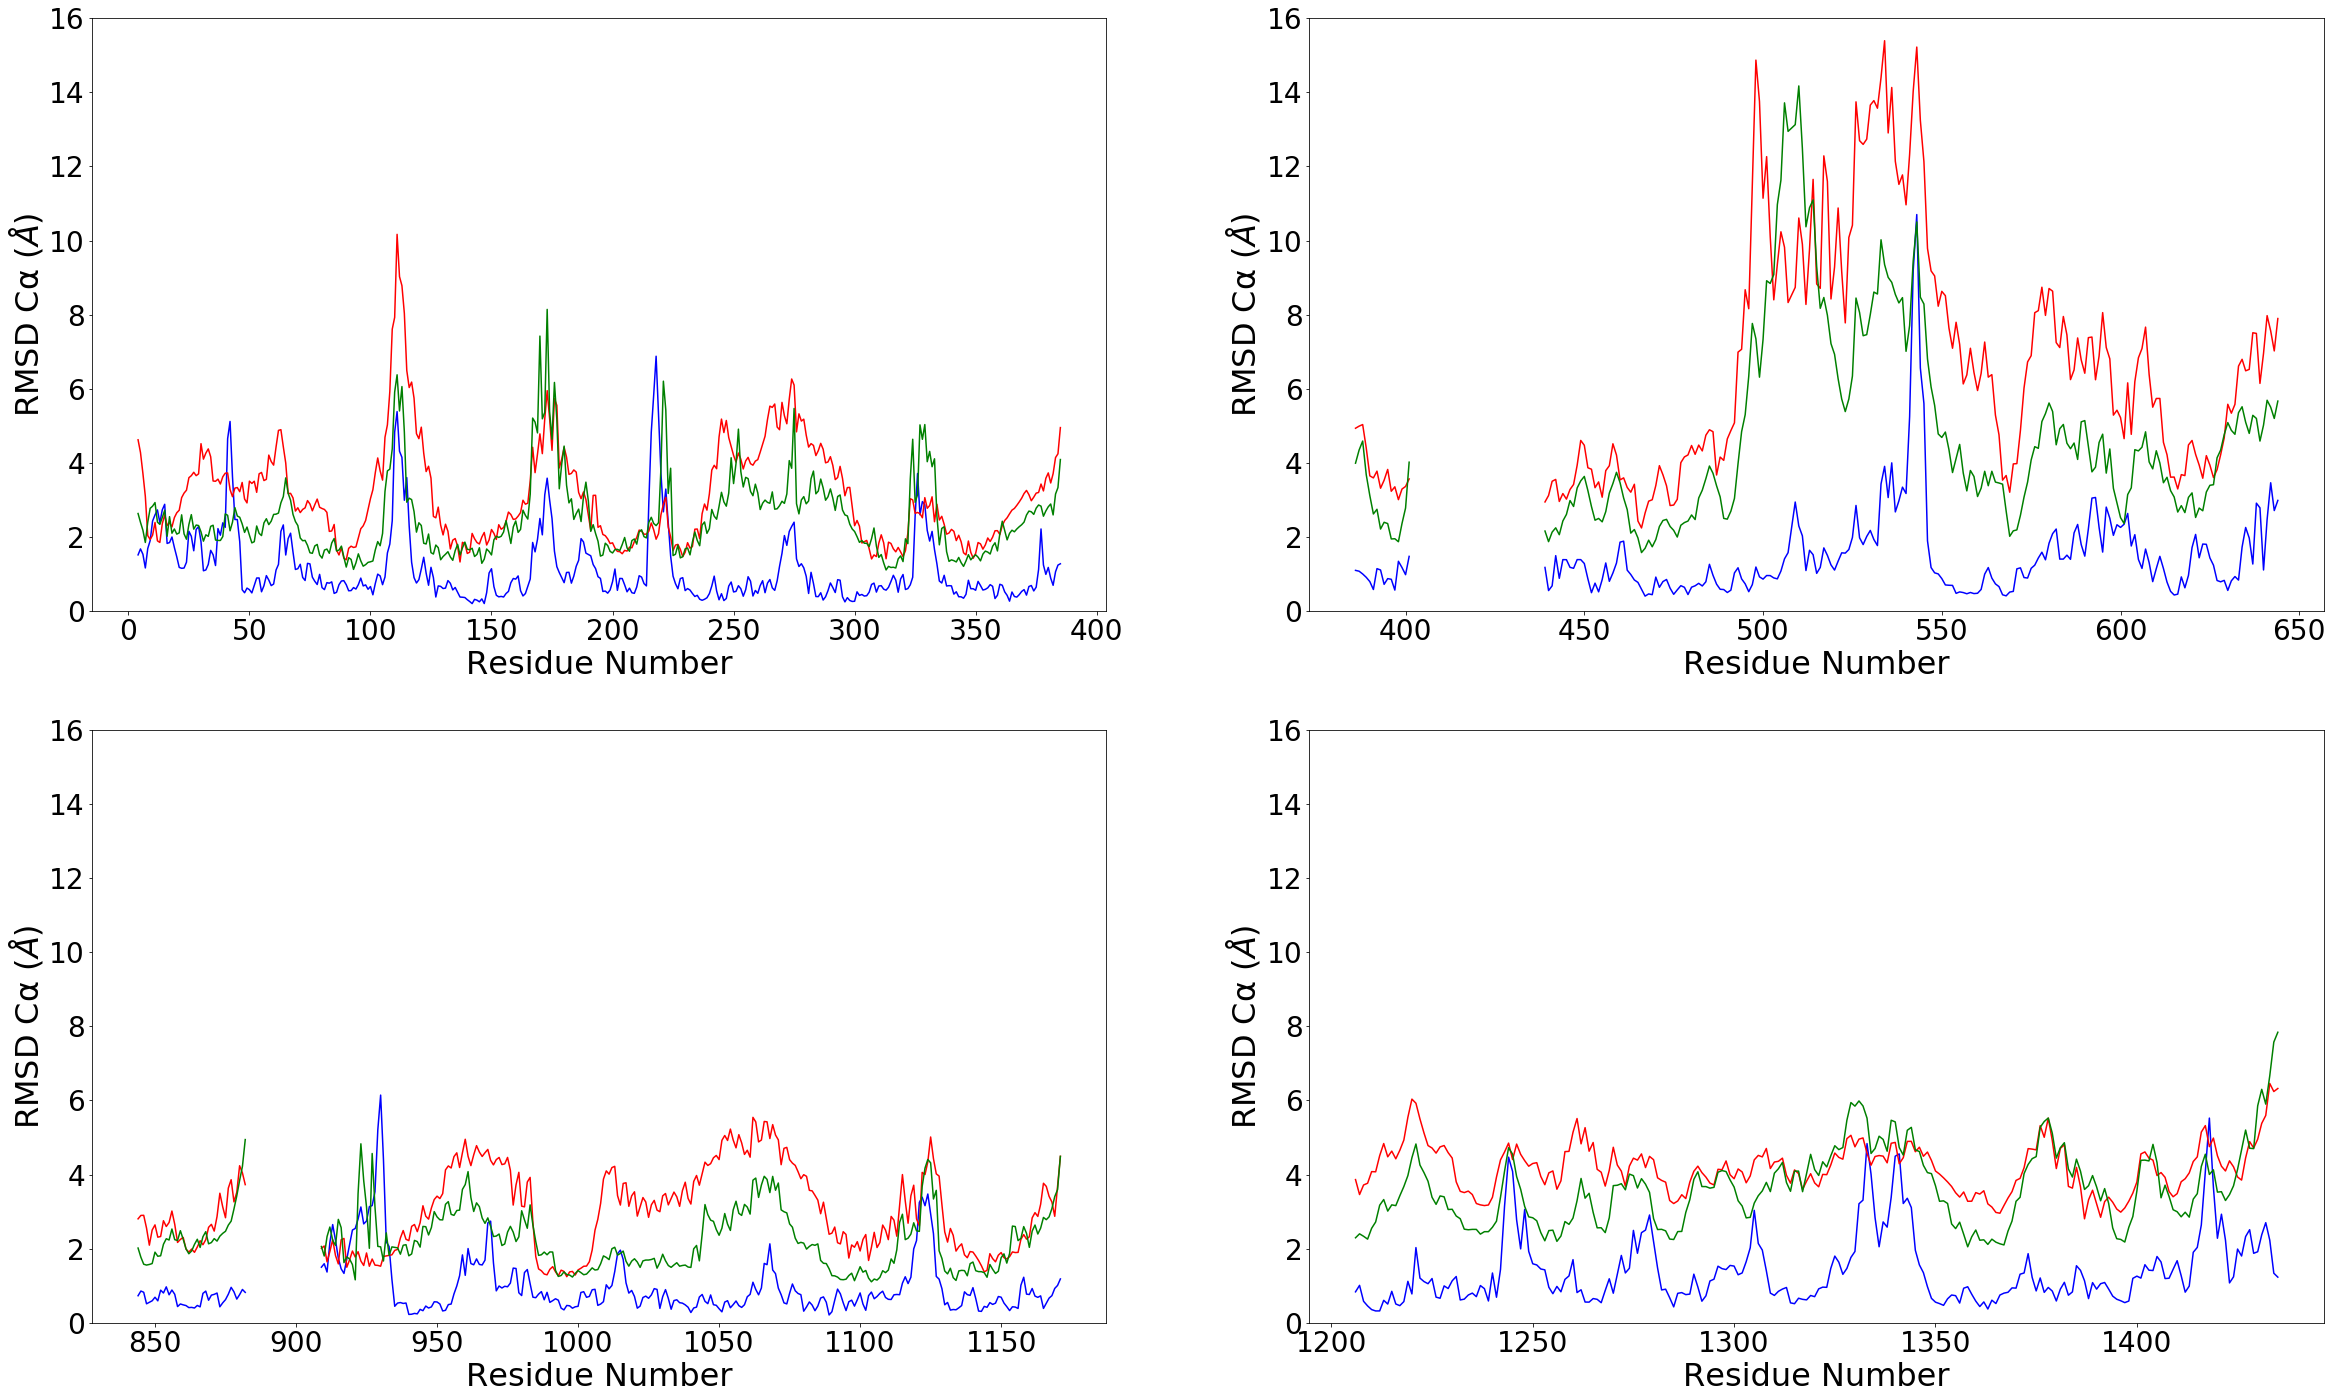

In [21]:
## Closed State Human CFTR 

TMD1 = np.array(range(4,386))
NBD1 = np.concatenate([range(386,403), range(439,508), range(509,645)])
TMD2 = np.concatenate([range(844,884), range(909,1172)])
NBD2 = np.array(range(1206,1436))

font = 30


fig, ax = plt.subplots(2,2)

fig.set_figheight(24)
fig.set_figwidth(40)


leg = np.array([[TMD1, NBD1] , [TMD2, NBD2]])
for (m,n), subplot in np.ndenumerate(ax):
    # WT CFTR
    ax[m,n].plot(WT_rmsd_data_cl.index[leg[m,n]],WT_rmsd_data_cl['avg'][leg[m,n]],color = 'blue')
    # F508del CFTR
    ax[m,n].plot(WT_rmsd_data_cl.index[leg[m,n]],F508del_rmsd_data_cl['avg'][leg[m,n]],color = 'red')
     # R1070W 
    ax[m,n].plot(WT_rmsd_data_cl.index[leg[m,n]],R1070W_rmsd_data_cl['avg'][leg[m,n]],color = 'green')
    
    
    # Axes Labels, tick size, and axes limits
    ax[m,n].set_ylabel('RMSD C\u03B1' +  ' ' + '(' + r'$\AA$' + ')',fontsize=font+2)
    ax[m,n].set_xlabel('Residue Number',fontsize =font+2)
    ax[m,n].tick_params(labelsize =font-2)
    subplot.set_ylim(0,16)

/home/mcdonaef/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:841: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


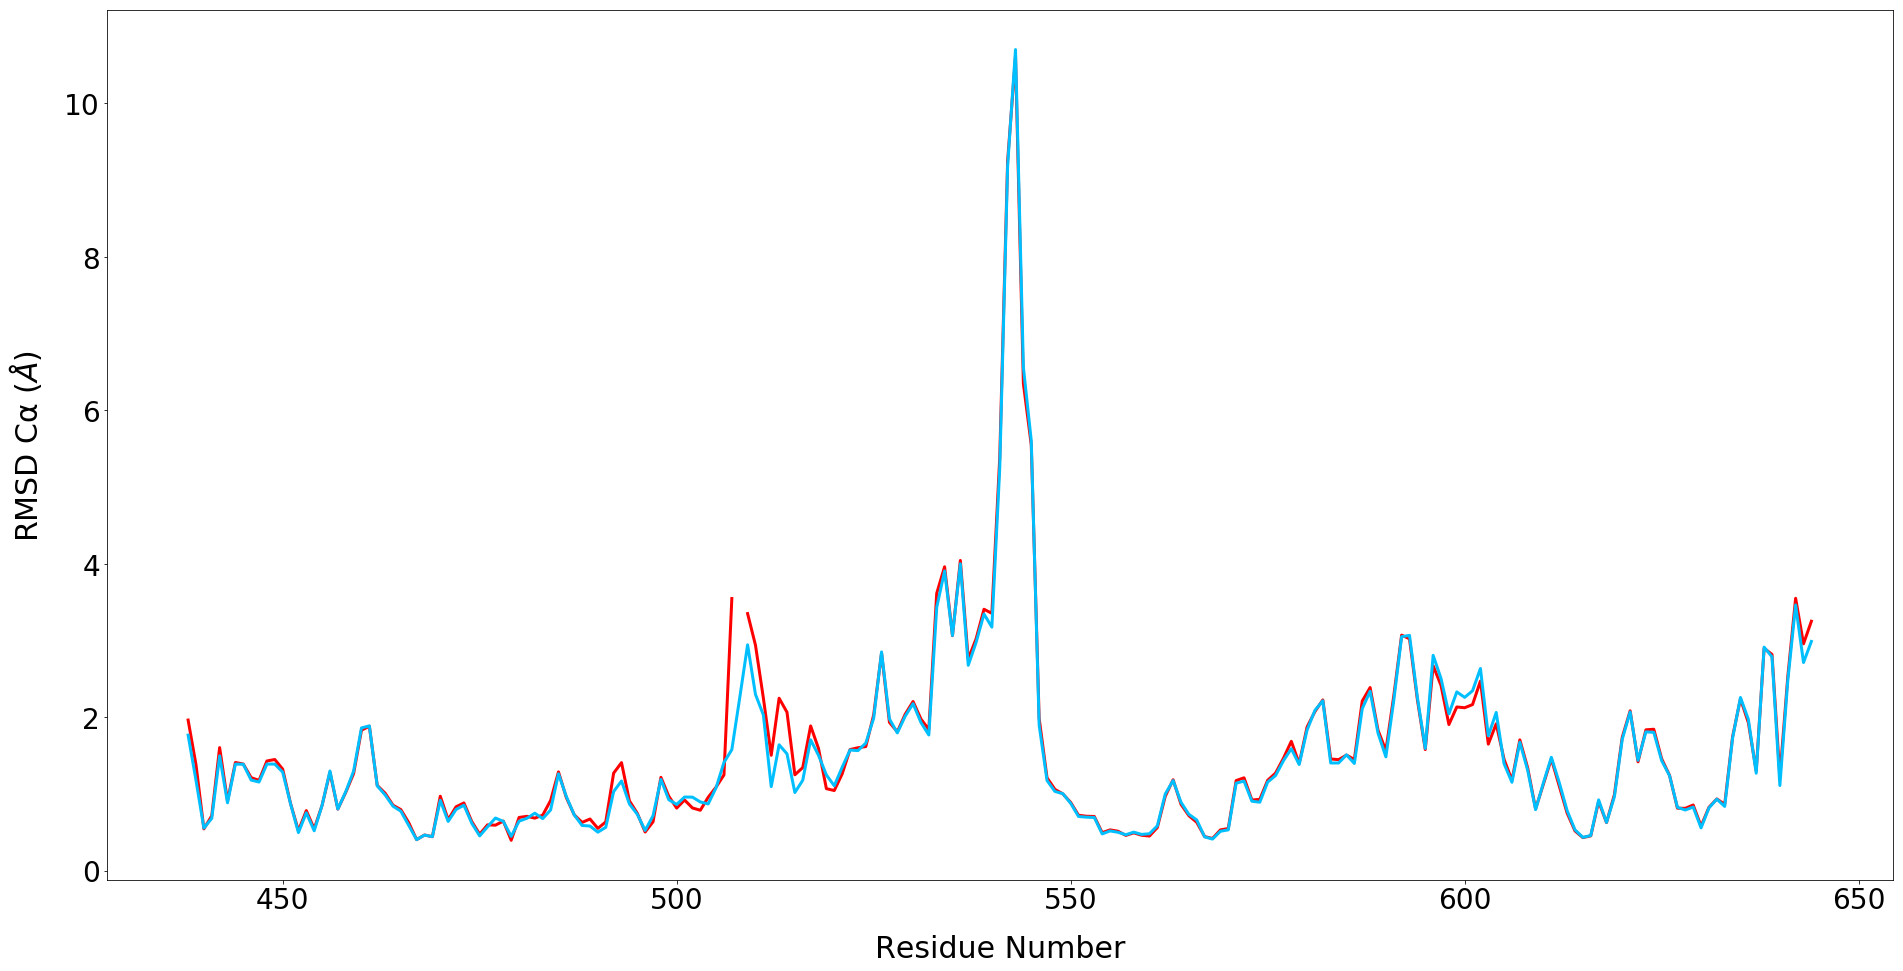

In [53]:
#seq = np.concatenate([range(4,386), range(386,403), range(339,645), range(844,884), range(909,1172), range(1206,1436)])
domain = np.array(range(430,645))

plt.figure(figsize= (32,16))
plt.plot(WT_rmsd_data_cl.index[domain],F508del_rmsd_data_cl['avg'][domain],color = 'red',linewidth = 3)
plt.plot(WT_rmsd_data_cl.index[domain],WT_rmsd_data_cl['avg'][domain],color = 'deepskyblue',linewidth = 3)


font=30
plt.xticks(fontsize=font-2)
plt.yticks(fontsize=font-2)
plt.xlabel('Residue Number', fontsize=font, labelpad=20)
plt.ylabel('RMSD C\u03B1' +  ' ' + '(' + r'$\AA$' + ')', fontsize=font,labelpad=20)



plt.savefig('../figures/5uak_NBD1_res_rmsd_WT_F508del.svg', format='svg')


/home/mcdonaef/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:841: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


Text(0,0.5,'RMSD Cα ($\\AA$)')

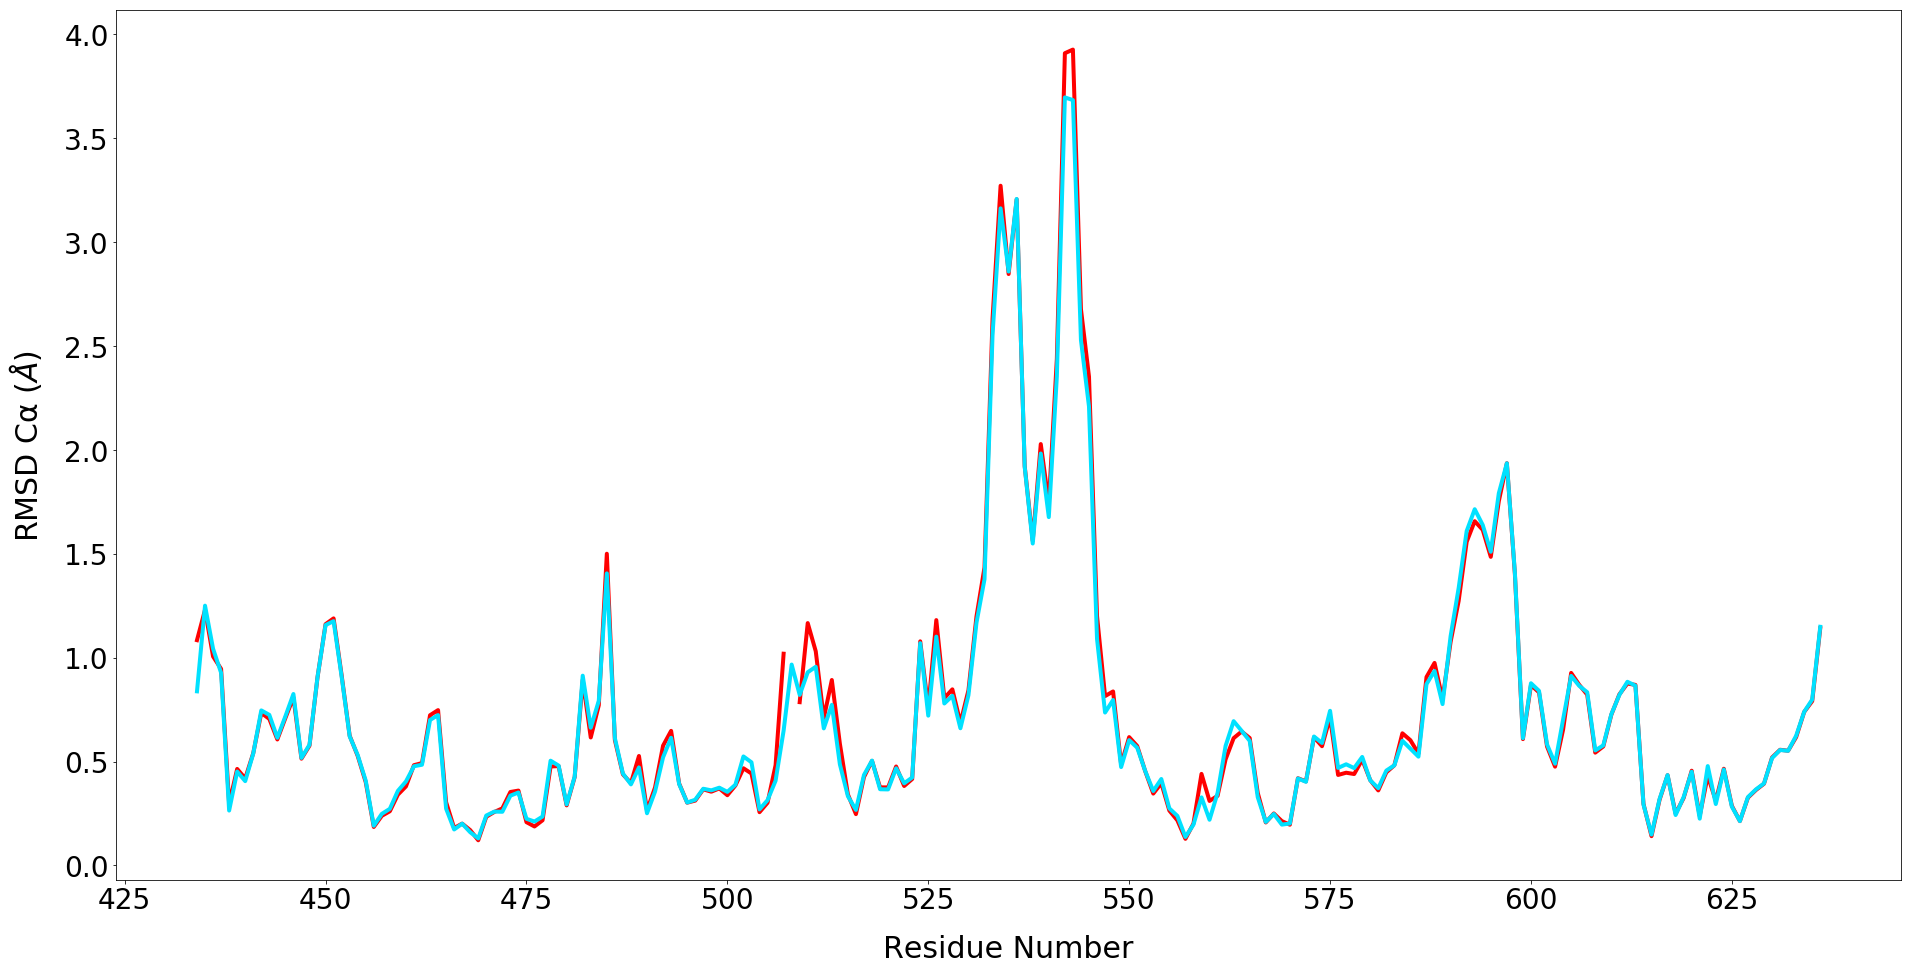

In [65]:
#seq = np.concatenate([range(4,386), range(386,403), range(339,645), range(844,884), range(909,1172), range(1206,1436)])
domain = np.array(range(430,645))

plt.figure(figsize= (32,16))
plt.plot(WT_rmsd_data_op.index[domain],F508del_rmsd_data_op['avg'][domain],color = 'red', linewidth = 4)
plt.plot(WT_rmsd_data_op.index[domain],WT_rmsd_data_op['avg'][domain],color = '#00E1FF', linewidth = 4)


font=30
plt.xticks(fontsize=font-2)
plt.yticks(fontsize=font-2)
plt.xlabel('Residue Number', fontsize=font, labelpad=20)
plt.ylabel('RMSD C\u03B1' +  ' ' + '(' + r'$\AA$' + ')', fontsize=font,labelpad=20)


#plt.savefig('../figures/6msm_NBD1_res_rmsd_WT_F508del.svg', format='svg')


In [62]:
#put the average values in b factor format: http://pldserver1.biochem.queensu.ca/~rlc/work/pymol/
with open('6msm_WT_res_rmsd_data.txt', 'a') as the_file:
    for index, row in WT_rmsd_data_op.iterrows():  
            rmsd = str(row['avg'])
            res = str(CFTR_seq[index])
            resnum = str(index)
            line = ['A', resnum, aa[res], rmsd]
            item = ' '.join(line) + '\n'
            the_file.write(item)
            
the_file.close()